
# Simple Linear Regression implemented from scratch using Batch Gradient Descent.
Loss: Mean Squared Error


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
train = "/content/Salary_Data.csv"
df = pd.read_csv(train)
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [201]:
X = df.YearsExperience
y = df.Salary

In [202]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [203]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


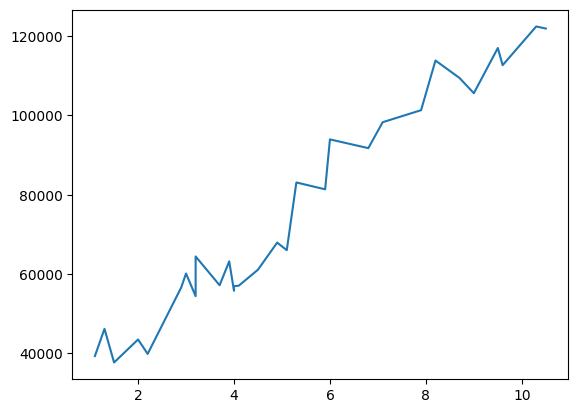

In [204]:
#plotting to understand the relation between both columns
plt.plot(X,y)

In [205]:
X = np.array(X)
y = np.array(y)


In [206]:
def mean(x):
  return np.sum(x)/len(x)

In [207]:
def variance(x):
  mean_value = mean(x)
  return np.sum((x-mean_value)**2)/len(x)

In [208]:
# normalize the column
def norm(x):
  mean_value = mean(x)
  variance_value = variance(x)
  return (x-mean_value)/np.sqrt(variance_value)

In [209]:
X_norm = norm(X)

In [210]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

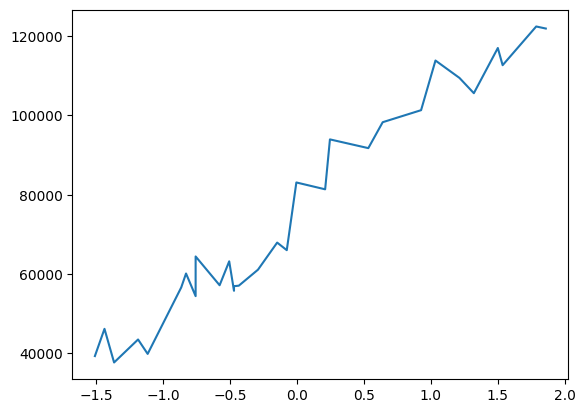

In [211]:
plt.plot(X_norm,y)

In [212]:
import random

In [213]:
class SimpleLR:
  def __init__(self, lr= 0.1 , max_iter= 2000 , threshold = 1e-6):
    self.lr = lr
    self.threshold = threshold
    self.max_iter = max_iter
    self.weight = random.uniform(-1,1)
    self.bias = random.uniform(-1,1)

  def predict(self,x):
    return self.weight*x + self.bias

  def fit(self,x,y):
    n= len(x)
    loss_history = []
    y_pred = self.predict(x)
    errors = y-y_pred
    prev_loss = (1/(2*n))* np.sum(errors**2)
    loss_history.append(prev_loss)
    for i in range(self.max_iter):
      w_grad = (1/n)*np.sum(errors*x)
      b_grad = (1/n)*np.sum(errors)
      self.weight += self.lr*w_grad
      self.bias += self.lr*b_grad
      y_pred = self.predict(x)
      errors = y-y_pred
      curr_loss = (1/(2*n))*np.sum(errors**2)
      if np.abs(curr_loss-prev_loss)<self.threshold:
        print("apple")
        break

      prev_loss = curr_loss
      loss_history.append(curr_loss)
    return(loss_history)

  def plot(self,x,y):
    y_pred = self.predict(x)
    plt.plot(x,y)
    plt.plot(x,y_pred)



In [214]:
model_lr = SimpleLR()

In [215]:
loss_hist = model_lr.fit(X_norm,y)

apple


In [216]:
# loss_hist

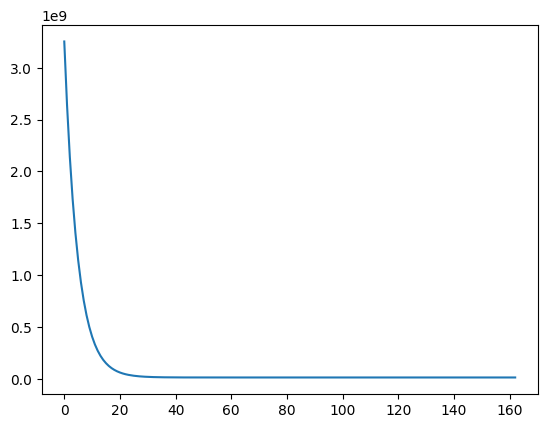

In [217]:
plt.plot(loss_hist)

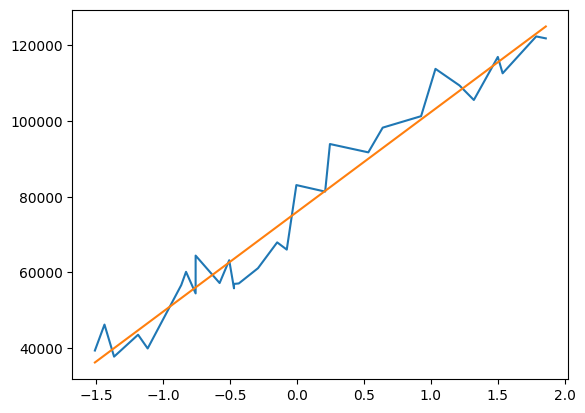

In [218]:
model_lr.plot(X_norm,y)